In [2]:
import numpy as np
import scipy.stats as stats
from scipy.optimize import minimize

In [7]:
# Problem statement
'''
    50X1 + 30X2 = 3000
    60X1 + 40X2 >= 50(X1 + X2)
    20X1 + 30X2 <= 25(X1 + X2)
    X1 + X2 = 100
'''
def cost_function(x):
    x_A, x_B = x
    return 50 * x_A + 30 * x_B

def constraint_property1(x):
    x_A, x_B = x
    return (60 * x_A + 40 *x_B) /(x_A + x_B) - 50

def constraint_property2(x):
    x_A, x_B = x
    return 25 - (20 * x_A + 30 * x_B) / (x_A + x_B)

def constraint_weight(x):
    x_A, x_B = x
    return x_A + x_B - 100

bounds = [(0,100), (0,100)]
initial_guess = [50,50]

constraints = [
    {'type': 'ineq', 'fun': constraint_property1},
    {'type': 'ineq', 'fun': constraint_property2},
    {'type': 'eq', 'fun': constraint_weight},
]
result = minimize(cost_function, initial_guess, constraints=constraints, bounds=bounds)

optimal_weights = result.x
x_A , x_B = optimal_weights
minimum_cost = result.fun

property1 = (60 * x_A + 40 *x_B) / (x_A + x_B)
property2 = (20 * x_A + 30 * x_B) / (x_A + x_B)

total_weight = x_A + x_B


print(f"Optimal Weights: Material A = {x_A:.2f} kg, Material B = {x_B:.2f} kg")
print(f"Minimum Cost: ${minimum_cost:.2f}")
print(f"Property 1: {property1:.2f}%")
print(f"Property 2: {property2:.2f}%")
print(f"Total Weight: {total_weight:.2f} kg")


Optimal Weights: Material A = 50.00 kg, Material B = 50.00 kg
Minimum Cost: $4000.00
Property 1: 50.00%
Property 2: 25.00%
Total Weight: 100.00 kg


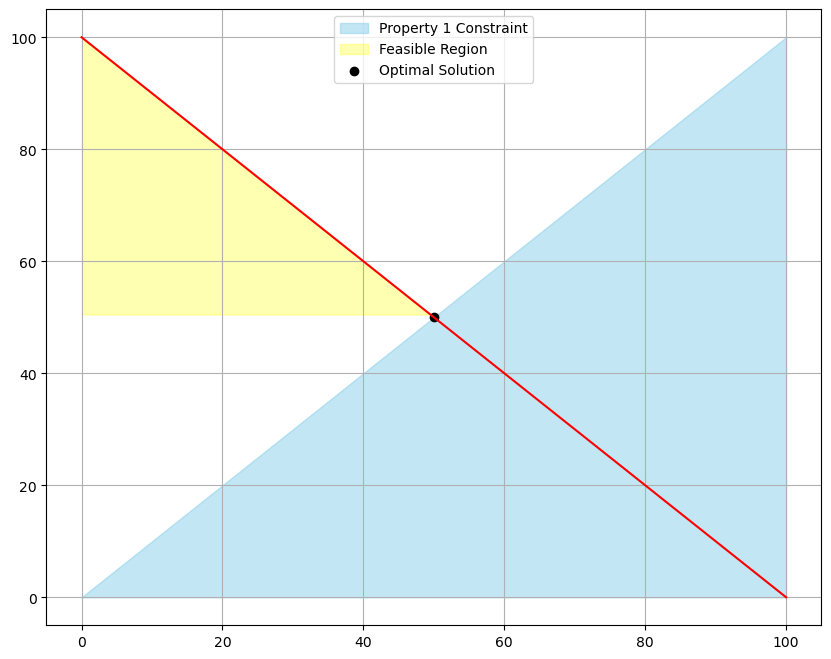

In [14]:
import matplotlib.pyplot as plt
x = np.linspace(0, 100, 100)
y_property1 = x
y_property2 = x
y_total_weight = 100 - x

plt.figure(figsize=(10,8))
plt.plot(x, y_total_weight, color='red')
plt.fill_between(x, 0, y_property1, color='skyblue', alpha=0.5, label="Property 1 Constraint")
plt.fill_betweenx(y_total_weight, 0, y_property1, where=(y_property1 <= y_total_weight), color='yellow', alpha=0.3, label="Feasible Region")

plt.scatter(50, 50, color='black', label='Optimal Solution')
plt.grid(True)
plt.legend()
plt.show()

In [11]:
import numpy as np
I = list(range(1, 11))
w = dict(zip(I, np.random.normal(loc=5.0, scale=1.0, size=len(I)).clip(0.5, 10.0)))
prices = dict(zip(I, np.random.normal(loc=10.0, scale=1.0, size=len(I)).clip(5.0, 20.0)))

k = 21.0

In [12]:
import pyomo.environ as pyo

model = pyo.ConcreteModel()
model.I = pyo.Set(initialize=I)
model.k = pyo.Param(initialize=k)
model.w = pyo.Param(model.I, initialize=w)
model.c = pyo.Param(model.I, initialize=prices)
model.x = pyo.Var(model.I, bounds=(0,1), within=pyo.Integers)

def capacity(model):
    return sum(model.x[i] * model.w[i] for i in model.I) <= model.k
model.capacity = pyo.Constraint(rule=capacity)
def objectionfx(model):
    return sum(model.x[i] * model.c[i] for i in model.I)

model.objective = pyo.Objective(rule=objectionfx, sense=pyo.maximize)
opt = pyo.SolverFactory('cbc')
solution = opt.solve(model)
model.objective.display()
model.x.display()

objective : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True : 53.53034683359292
x : Size=10, Index=I
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :     0 :   1.0 :     1 : False : False : Integers
      2 :     0 :   0.0 :     1 : False : False : Integers
      3 :     0 :   1.0 :     1 : False : False : Integers
      4 :     0 :   0.0 :     1 : False : False : Integers
      5 :     0 :   1.0 :     1 : False : False : Integers
      6 :     0 :   1.0 :     1 : False : False : Integers
      7 :     0 :   0.0 :     1 : False : False : Integers
      8 :     0 :   0.0 :     1 : False : False : Integers
      9 :     0 :   0.0 :     1 : False : False : Integers
     10 :     0 :   1.0 :     1 : False : False : Integers


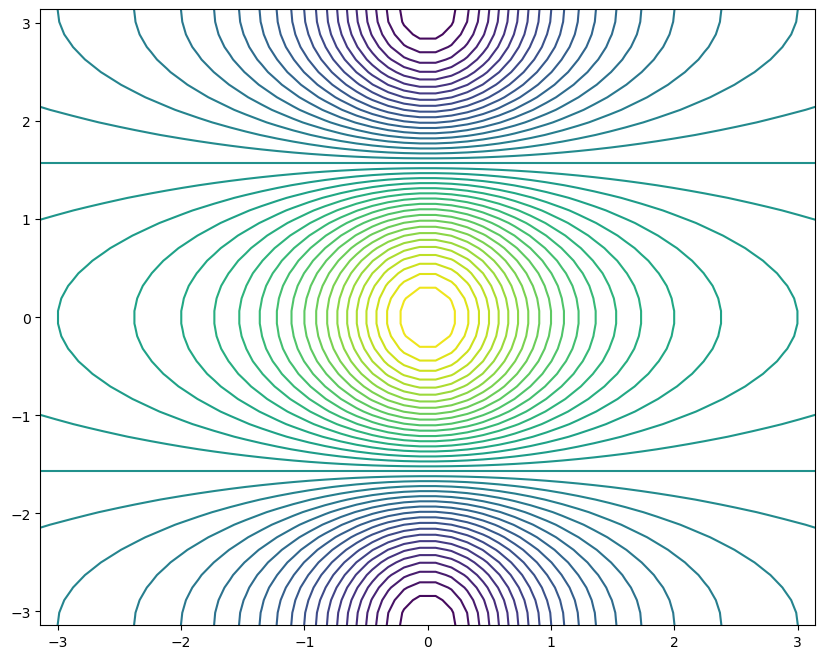

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10,8))
x = np.linspace(-np.pi, np.pi, 50)
y = x
f = np.multiply.outer(np.cos(y), 1/ (1+x**2))
ax.contour(x,y,f, levels=45)
plt.show()

In [4]:
A = np.array(np.arange(16)).reshape((4,4))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [13]:
A[1,2]

6

In [16]:
A[[1,3], :], A[:, [1,2]]

(array([[ 4,  5,  6,  7],
        [12, 13, 14, 15]]),
 array([[ 1,  2],
        [ 5,  6],
        [ 9, 10],
        [13, 14]]))

In [17]:
A[[1,3],[0,2]]

array([ 4, 14])

In [20]:
# We reduce by creating the sub matrix and then accessing the elements
# We also can use np.is_x
A[[1,3]][:, [0,2]]

array([[ 4,  6],
       [12, 14]])

In [21]:
def euclidean_distance(A, B):
    return np.sqrt(np.sum((np.array(A) - np.array(B))**2))
point1 = [2,4,5]
point2 = [0,4,1]
distance = euclidean_distance(point1, point2)
print(distance)

4.47213595499958


In [23]:
# minimum euclidean distance
euclidean_distance = lambda A, B: np.sqrt(np.sum((np.array(A) - np.array(B))**2))
euclidean_distance(point1, point2)

4.47213595499958

In [34]:
# Implementing K nearest Neighbor
from collections import Counter

dataset = [
    {'features': [0, 3, 0], 'label': 'Red'},
    {'features': [2, 0, 0], 'label': 'Red'},
    {'features': [0, 1, 3], 'label': 'Red'},
    {'features': [0, 1, 2], 'label': 'Green'},
    {'features': [-1, 0, 1], 'label': 'Green'}
]
new_points = [1,2,-1]
# KNN function
def k_nearest_neighbors(data,new_points, k):
    # Initialize Distance Variable to hold (distance and label)
    distances = []
    for item in data:
        dist = euclidean_distance(item['features'], new_points)
        distances.append((dist, item['label'])) # Append the tuple (distance, label)
    distances = sorted(distances, key=lambda x: x[0]) # Sort according to distance
    k_nearest = distances[:k] # Slice the distances using K
    print(distances)
    print(k_nearest)

    labels = [label for _, label in k_nearest] # return labels and get the most common

    most_common = Counter(labels).most_common(1) # Use counter variable to get the most common
    return most_common[0][0]
k = 2
prediction = k_nearest_neighbors(dataset,new_points, k)
print(f'Predicted Label: {prediction}')

[(1.7320508075688772, 'Red'), (2.449489742783178, 'Red'), (3.3166247903554, 'Green'), (3.4641016151377544, 'Green'), (4.242640687119285, 'Red')]
[(1.7320508075688772, 'Red'), (2.449489742783178, 'Red')]
Predicted Label: Red
